In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

https://archive.ics.uci.edu/ml/datasets/Heart+Disease - original source data

description of the data:
    This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them.  In particular, the Cleveland database is the only one that has been used by ML researchers to date.  The "goal" field refers to the presence of heart disease in the patient.  It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

In [2]:
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df['target'].unique()

array([1, 0], dtype=int64)

explore the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


<AxesSubplot:xlabel='target', ylabel='count'>

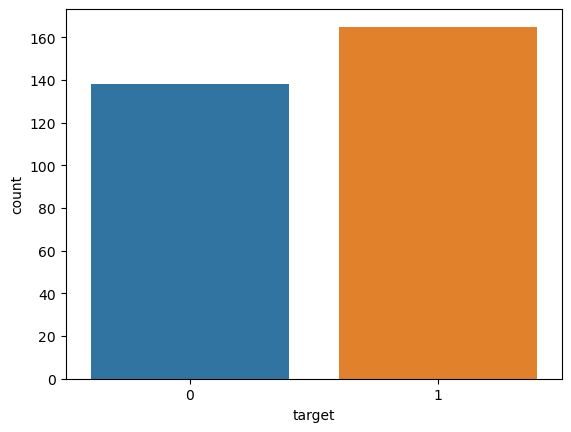

In [8]:
sns.countplot(x='target',data=df)

<AxesSubplot:xlabel='sex', ylabel='count'>

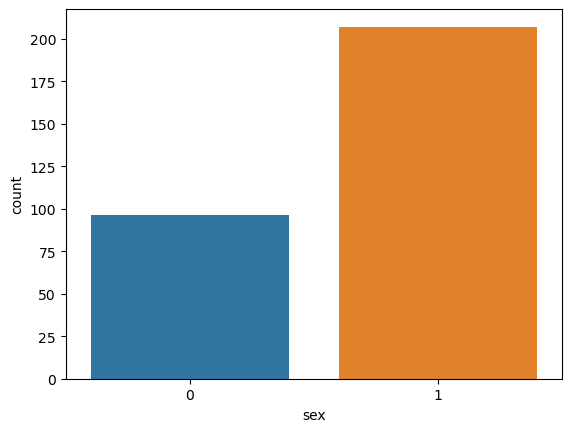

In [9]:
sns.countplot(x='sex',data=df)

In [10]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

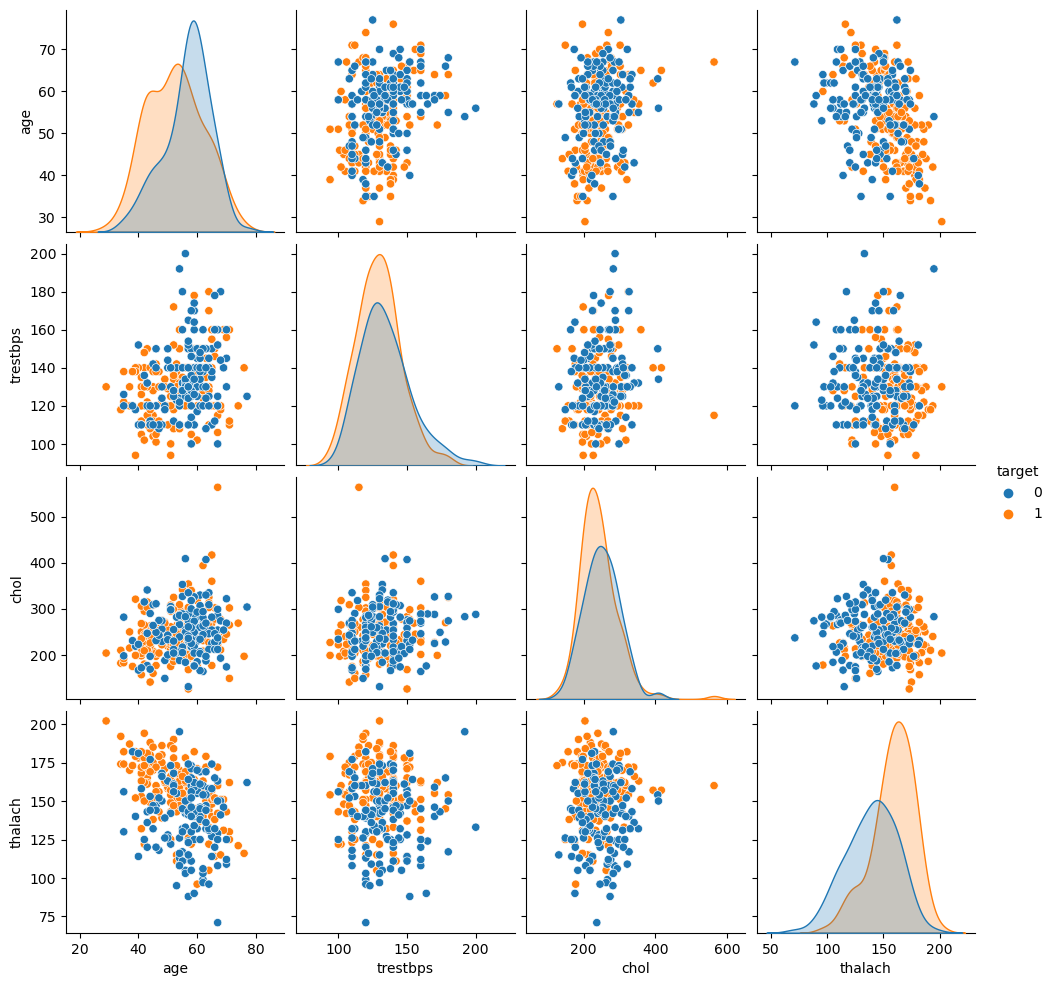

In [11]:
sns.pairplot(df[['age','trestbps', 'chol','thalach','target']],hue='target')

<AxesSubplot:>

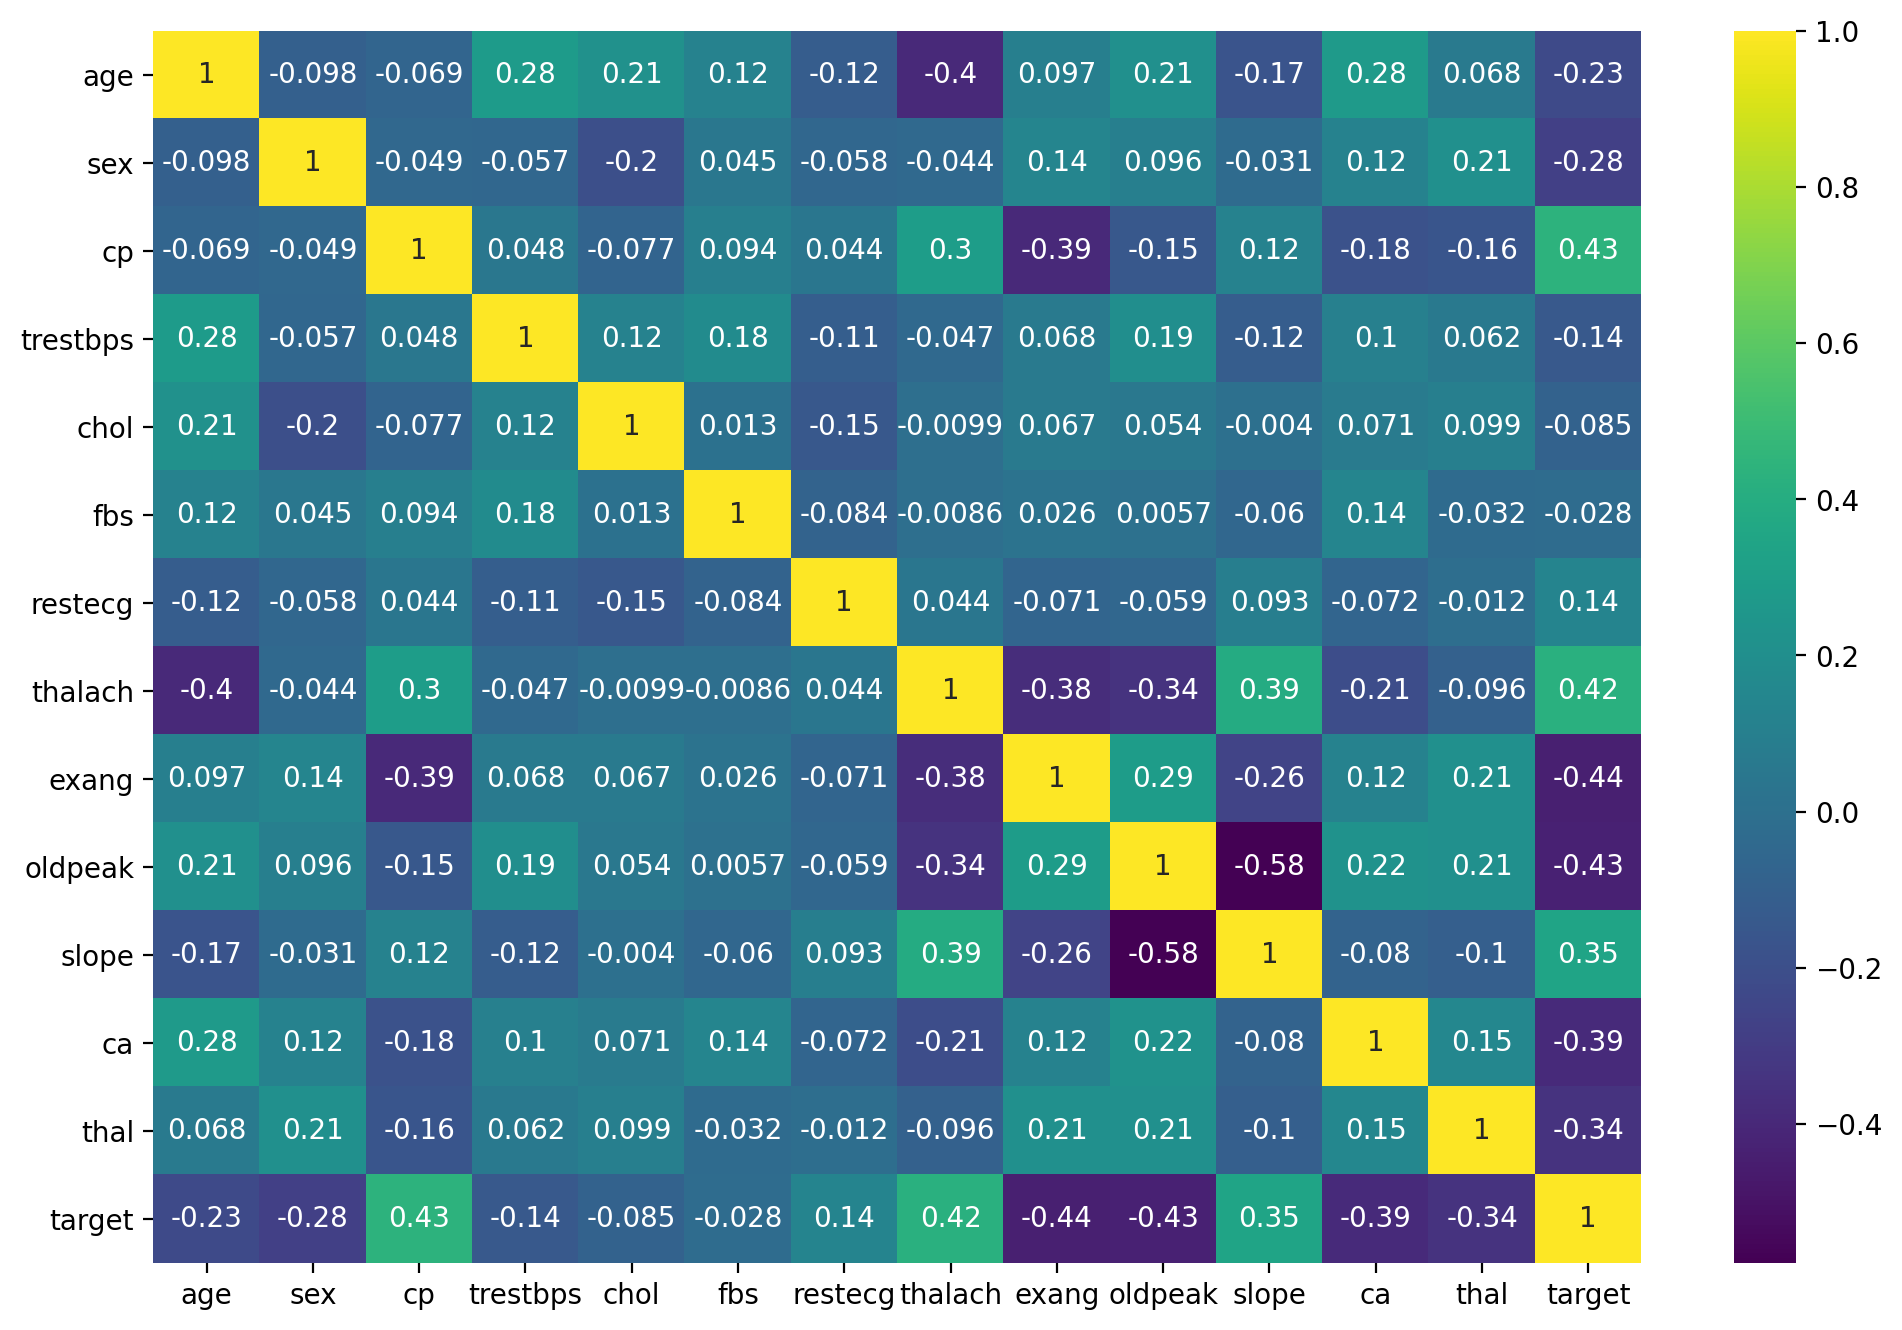

In [13]:
plt.figure(figsize=(12,8),dpi=200)
sns.heatmap(df.corr(),cmap='viridis',annot=True)

nw i gona train the machine learning model - logistic regression

In [14]:
X = df.drop('target',axis=1)
y = df['target']

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

///////////////////////////////////////////////////////////////////////////

In [17]:
scaler = StandardScaler()

In [18]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [19]:
from sklearn.linear_model import LogisticRegressionCV 

In [21]:
# help(LogisticRegressionCV)

In [22]:
log_model = LogisticRegressionCV()

In [23]:
log_model.fit(scaled_X_train,y_train)

LogisticRegressionCV()

In [24]:
log_model.C_

array([0.04641589])

In [25]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [26]:
log_model.coef_

array([[-0.09621199, -0.39460154,  0.53534731, -0.13850191, -0.08830462,
         0.02487341,  0.08083826,  0.29914053, -0.33438151, -0.352386  ,
         0.25101033, -0.49735752, -0.37448551]])

///////////////////////////////////////////////////////////////////////////////////////////

In [27]:
coefs = pd.Series(index=X.columns,data=log_model.coef_[0])

In [28]:
coefs = coefs.sort_values()

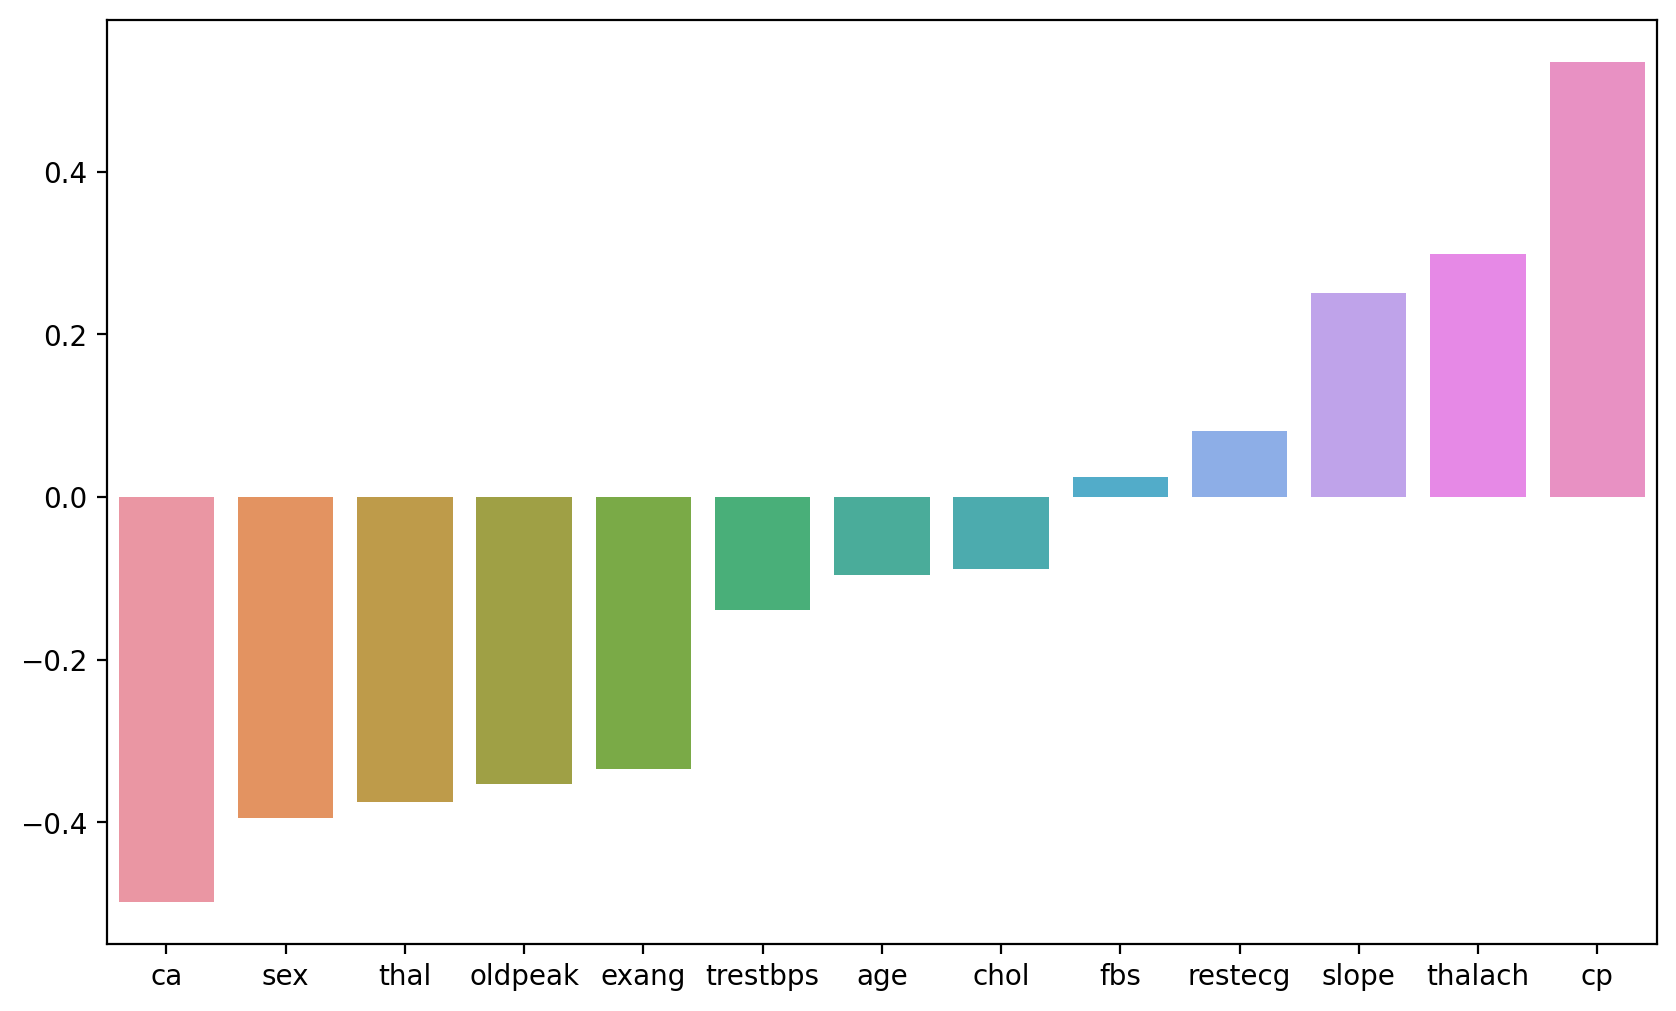

In [30]:
plt.figure(figsize=(10,6),dpi=200)
sns.barplot(x=coefs.index,y=coefs.values);

/////////////////////////////////////////////////////////////////////////

In [31]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [32]:
y_pred = log_model.predict(scaled_X_test)

In [33]:
confusion_matrix(y_test,y_pred)

array([[12,  3],
       [ 2, 14]], dtype=int64)

///////////////////////////////////////////////////////////////////////

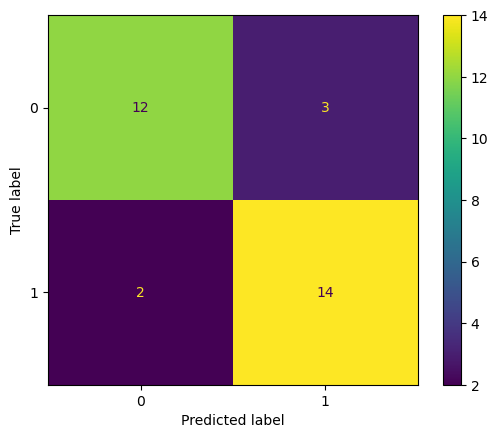

In [34]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

/////////////////////////////////////////////////////////////////////////////

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



///////////////////////////////////////////////////////////////////////

now lets see some performance curves about the model

In [37]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

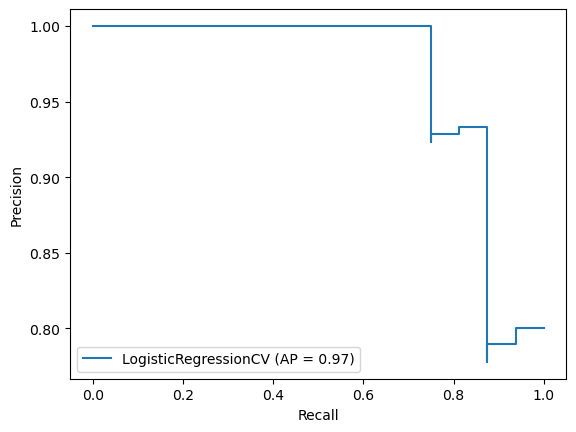

In [38]:
plot_precision_recall_curve(log_model,scaled_X_test,y_test)

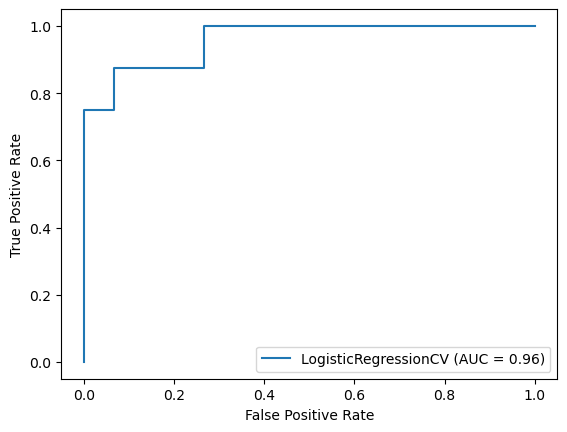

In [39]:
plot_roc_curve(log_model,scaled_X_test,y_test)

///////////////////////////////////////////////////////////////////////////

now lets try make a predict for a fake patient

In [40]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [41]:
X_test.iloc[-1]

age          54.0
sex           1.0
cp            0.0
trestbps    122.0
chol        286.0
fbs           0.0
restecg       0.0
thalach     116.0
exang         1.0
oldpeak       3.2
slope         1.0
ca            2.0
thal          2.0
Name: 268, dtype: float64

In [42]:
y_test.iloc[-1]

0

In [43]:
log_model.predict(patient)

array([0], dtype=int64)

In [44]:
log_model.predict_proba(patient)

array([[9.99999862e-01, 1.38455917e-07]])